In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import animation
import warnings
warnings.filterwarnings("ignore")
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
# invoking SimpleImputer to fill missing values

In [29]:
btc = pd.read_csv("C:/Users/user/datasets/BTC-USD.csv")
btc

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2646,2021-12-15,48379.753906,49473.957031,46671.964844,48896.722656,48896.722656,3.654183e+10
2647,2021-12-16,48900.464844,49425.574219,47529.878906,47665.425781,47665.425781,2.726815e+10
2648,2021-12-17,47653.730469,48004.894531,45618.214844,46202.144531,46202.144531,3.290273e+10
2649,2021-12-18,46219.253906,47313.828125,45598.441406,46848.777344,46848.777344,2.609829e+10


In [30]:
btc.isna().sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

# Data Cleaning and Preprocessing
 Handling missing values

In [31]:
# For this case will use SimpleImputer from sklearn library
COLS = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
btc[COLS] = imputer.fit_transform(btc[COLS])

In [32]:
btc.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [33]:
btc.describe().T.style.background_gradient(cmap="magma")

,count,mean,std,min,25%,50%,75%,max
Open,2651.000000,10572.918176,15530.744589,176.897003,589.917999,6036.660156,10161.855469,67549.734375
High,2651.000000,10863.606745,15961.476665,211.731003,598.014496,6250.467285,10367.627930,68789.625000
Low,2651.000000,10253.312440,15035.073387,171.509995,584.886017,5826.410156,9840.927735,66382.062500
Close,2651.000000,10588.253055,15540.729018,178.102997,591.578522,6083.689941,10166.834473,67566.828125
Adj Close,2651.000000,10588.253055,15540.729018,178.102997,591.578522,6083.689941,10166.834473,67566.828125
Volume,2651.000000,14239964175.339252,19927209118.255402,5914570.000000,76661800.000000,4894060032.000000,23522160721.500000,350967941479.000000


In [34]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2651 non-null   object 
 1   Open       2651 non-null   float64
 2   High       2651 non-null   float64
 3   Low        2651 non-null   float64
 4   Close      2651 non-null   float64
 5   Adj Close  2651 non-null   float64
 6   Volume     2651 non-null   float64
dtypes: float64(6), object(1)
memory usage: 145.1+ KB


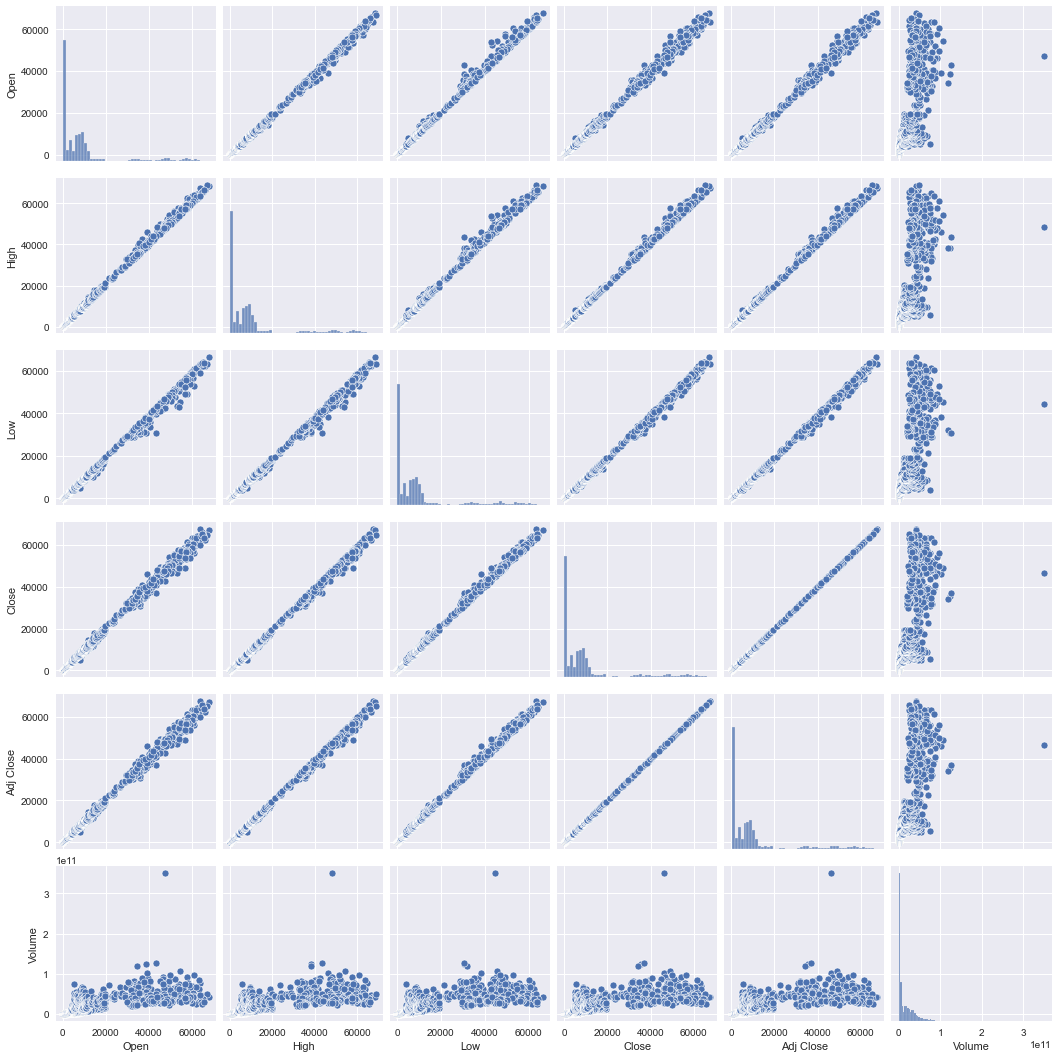

In [35]:
plt.style.use("seaborn")
sns.pairplot(btc)

# Exploratory Data Analysis
Open

In [36]:
plt.style.use("fivethirtyeight")

<AxesSubplot:xlabel='Date', ylabel='Open'>

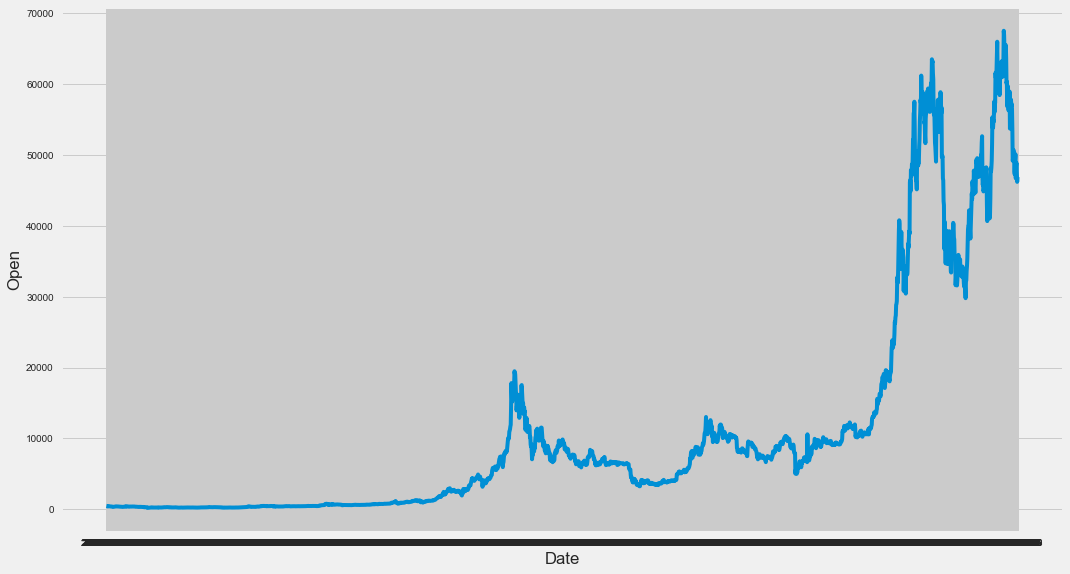

In [37]:
f, ax = plt.subplots(figsize=(16,9))
sns.lineplot(x="Date", y="Open", data=btc)

High

In [38]:
plt.style.use("seaborn")

<AxesSubplot:xlabel='Date', ylabel='High'>

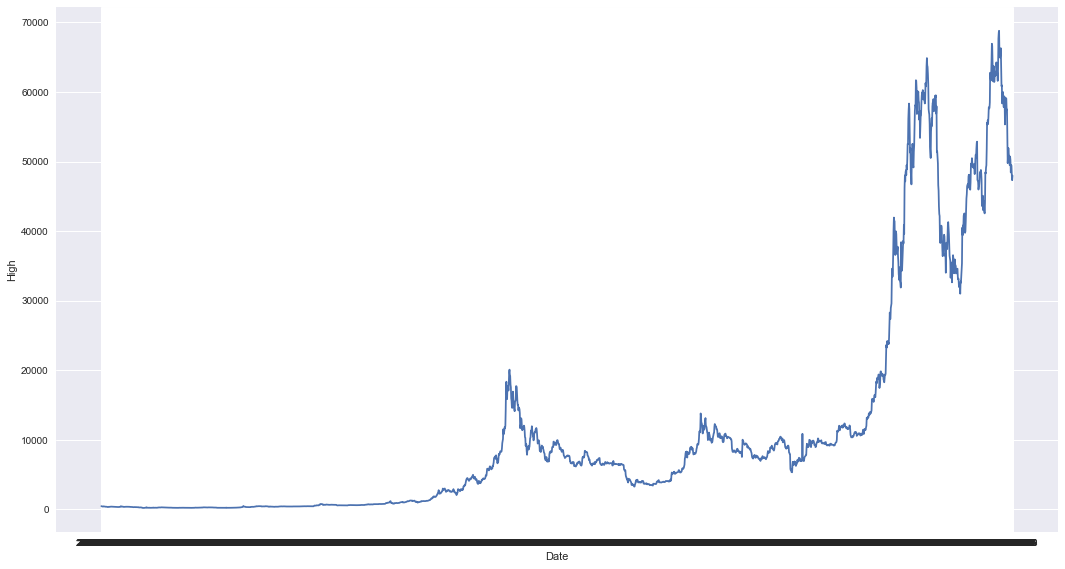

In [39]:
f, ax=plt.subplots(figsize=(16,9))
sns.lineplot(x="Date", y="High", data=btc)

Low

In [40]:
plt.style.use("fivethirtyeight")

<AxesSubplot:xlabel='Date', ylabel='High'>

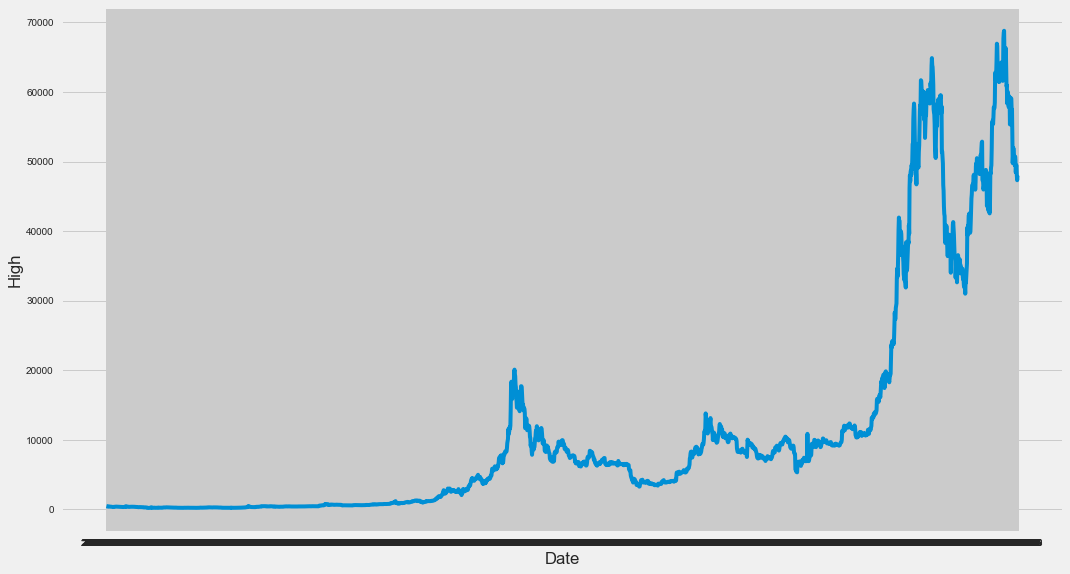

In [41]:
f, ax=plt.subplots(figsize=(16,9))
sns.lineplot(x="Date", y="High", data=btc)

Close

<AxesSubplot:xlabel='Date', ylabel='Close'>

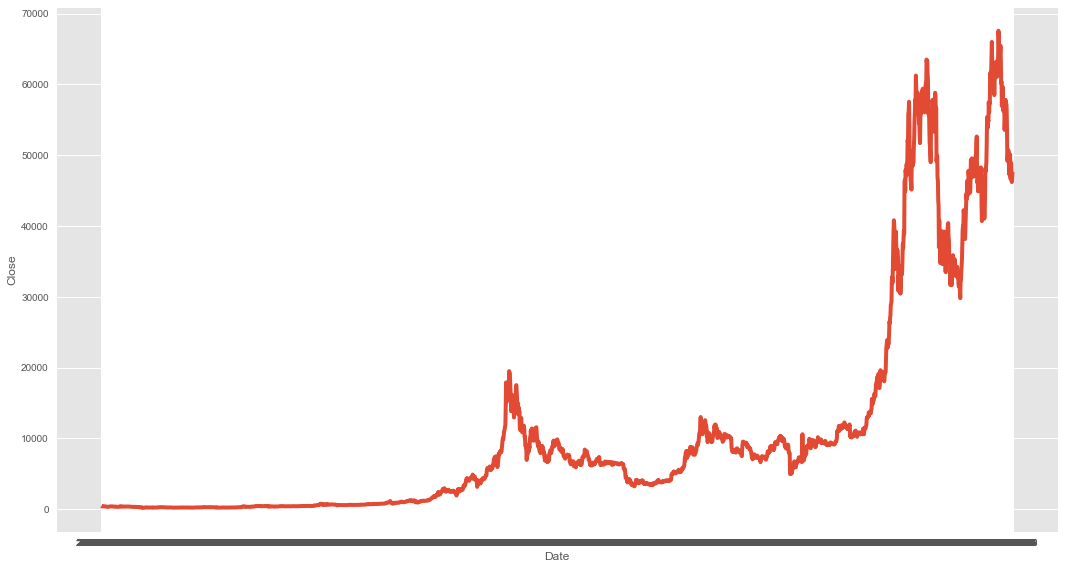

In [42]:
plt.style.use("ggplot")
f, ax=plt.subplots(figsize=(16,9))
sns.lineplot(x="Date", y="Close", data=btc)

Adj Close

<AxesSubplot:xlabel='Date', ylabel='Adj Close'>

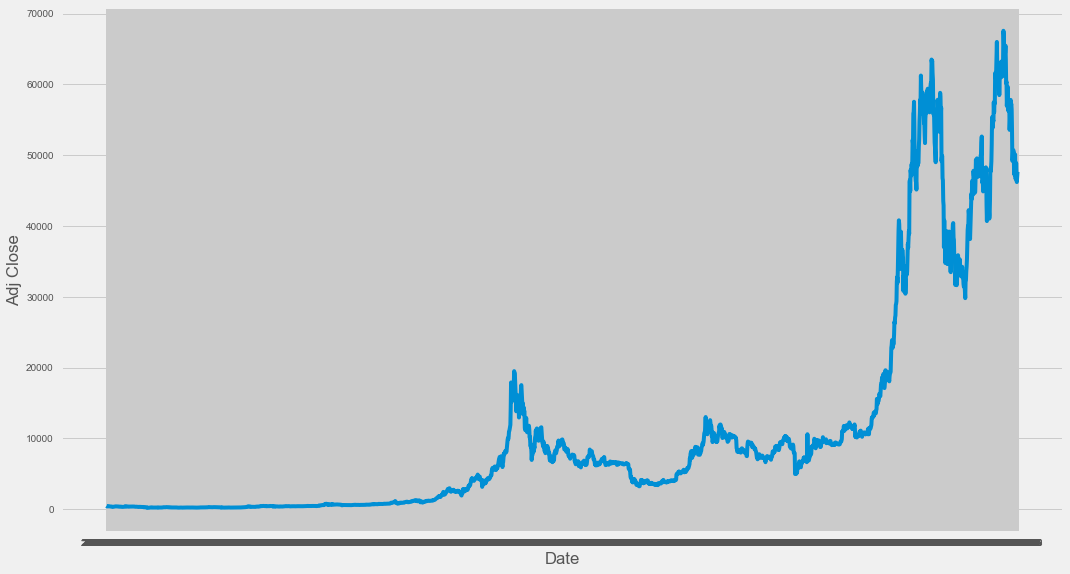

In [43]:
plt.style.use("fivethirtyeight")
_,ax=plt.subplots(figsize=(16,9))
sns.lineplot(x="Date", y="Adj Close", data=btc)

Let us check the Adj Close density

<AxesSubplot:xlabel='Adj Close', ylabel='Density'>

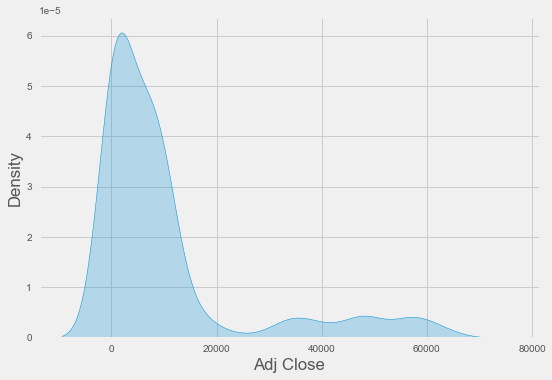

In [44]:
sns.kdeplot(x=btc["Adj Close"], shade=True)

Volume

<AxesSubplot:xlabel='Volume', ylabel='Density'>

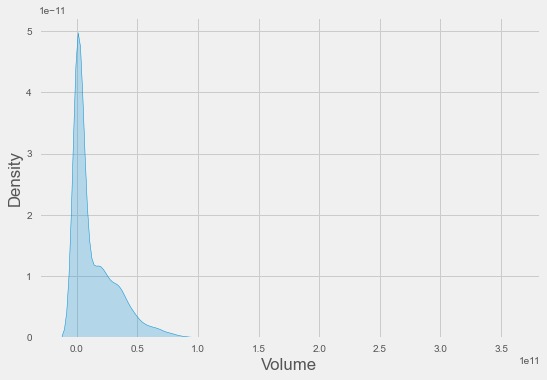

In [45]:
sns.kdeplot(x=btc["Volume"], shade=True)

<AxesSubplot:xlabel='Date', ylabel='Volume'>

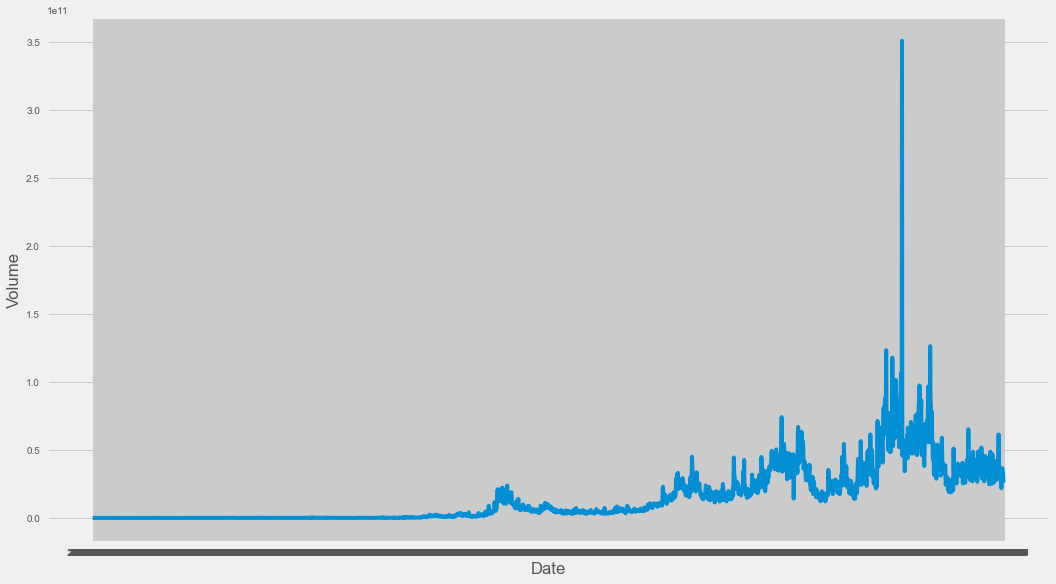

In [46]:
plt.style.use("fivethirtyeight")
_,ax=plt.subplots(figsize=(16,9))
sns.lineplot(x="Date", y="Volume", data=btc)

* The volume was relatively equal till at a point when it spiked suddenly. We shall put a star on that.

# Time Analysis

Let us obtain the respective years and months for further analysis

In [47]:
import calendar
btc.Date = pd.to_datetime(btc.Date)

In [54]:
btc['Month']=pd.DatetimeIndex(btc['Date']).month
btc['Year'] = pd.DatetimeIndex(btc['Date']).year
# Convert month to respective name
btc.Month = btc.Month.apply(lambda x: calendar.month_name[x])

In [55]:
btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,September,2014
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,September,2014
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,September,2014
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,September,2014
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,September,2014


# We will take  a further at the volume to have a look at the spike

Text(0.5, 1.0, 'Volume of Bitcoin Traded since 2015 - 2021')

<Figure size 1152x648 with 0 Axes>

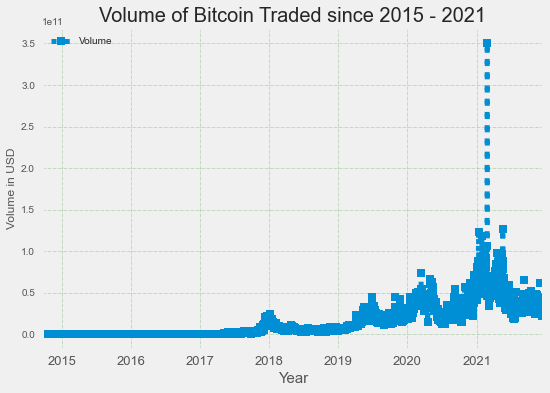

In [56]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,9))
btc[["Volume","Date"]].groupby(["Date"]).mean().plot(marker="s", ms=8, lw=5, ls=":", mec="navy")
plt.tick_params(axis="x", which="major", labelsize=13)
plt.grid(alpha=.4, ls="-.", lw=.5, c="g")
plt.xlabel("Year", fontsize=15)
plt.ylabel("Volume in USD", fontsize=12)
plt.title("Volume of Bitcoin Traded since 2015 - 2021", fontsize=20)

* So the spike was in 2021 due to several factpors eg awareness of the coin
* Let us identify the month

In [57]:
btc21 = btc.loc[btc.Year==2021]

In [58]:
btc21

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year
2298,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,4.073030e+10,January,2021
2299,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,6.786542e+10,January,2021
2300,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,7.866524e+10,January,2021
2301,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,8.116348e+10,January,2021
2302,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,6.754732e+10,January,2021
...,...,...,...,...,...,...,...,...,...
2646,2021-12-15,48379.753906,49473.957031,46671.964844,48896.722656,48896.722656,3.654183e+10,December,2021
2647,2021-12-16,48900.464844,49425.574219,47529.878906,47665.425781,47665.425781,2.726815e+10,December,2021
2648,2021-12-17,47653.730469,48004.894531,45618.214844,46202.144531,46202.144531,3.290273e+10,December,2021
2649,2021-12-18,46219.253906,47313.828125,45598.441406,46848.777344,46848.777344,2.609829e+10,December,2021


Text(0.5, 1.0, 'Volume of Bitcoin Traded in 2021')

<Figure size 1152x648 with 0 Axes>

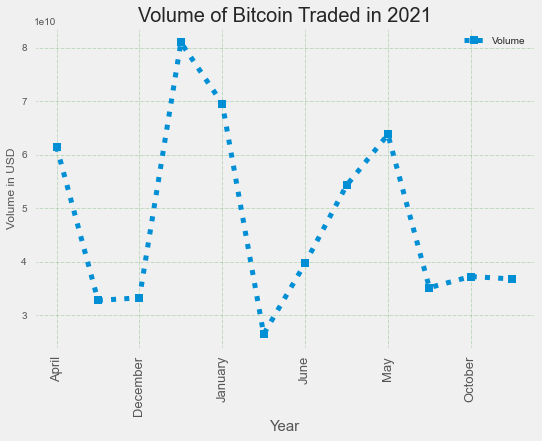

In [60]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,9))
btc21[["Volume","Month"]].groupby(["Month"]).mean().plot(marker="s", ms=8, lw=5, ls=":", mec="navy")
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.grid(alpha=.4, ls="-.", lw=.5, c="g")
plt.xlabel("Year", fontsize=15)
plt.ylabel("Volume in USD", fontsize=12)
plt.title("Volume of Bitcoin Traded in 2021", fontsize=20)

# The last 10 Days of 2021

In [61]:
btc21.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year
2641,2021-12-10,47642.144531,50015.253906,47023.699219,47243.304688,47243.304688,3.096601e+10,December,2021
2642,2021-12-11,47264.632813,49458.210938,46942.347656,49362.507813,49362.507813,2.577587e+10,December,2021
2643,2021-12-12,49354.855469,50724.867188,48725.851563,50098.335938,50098.335938,2.193922e+10,December,2021
2644,2021-12-13,50114.742188,50205.000000,45894.847656,46737.480469,46737.480469,3.216673e+10,December,2021
2645,2021-12-14,46709.824219,48431.398438,46424.496094,46612.632813,46612.632813,3.463862e+10,December,2021
2646,2021-12-15,48379.753906,49473.957031,46671.964844,48896.722656,48896.722656,3.654183e+10,December,2021
2647,2021-12-16,48900.464844,49425.574219,47529.878906,47665.425781,47665.425781,2.726815e+10,December,2021
2648,2021-12-17,47653.730469,48004.894531,45618.214844,46202.144531,46202.144531,3.290273e+10,December,2021
2649,2021-12-18,46219.253906,47313.828125,45598.441406,46848.777344,46848.777344,2.609829e+10,December,2021
2650,2021-12-19,46902.777344,47973.355469,46544.714844,47638.589844,47638.589844,2.563318e+10,December,2021


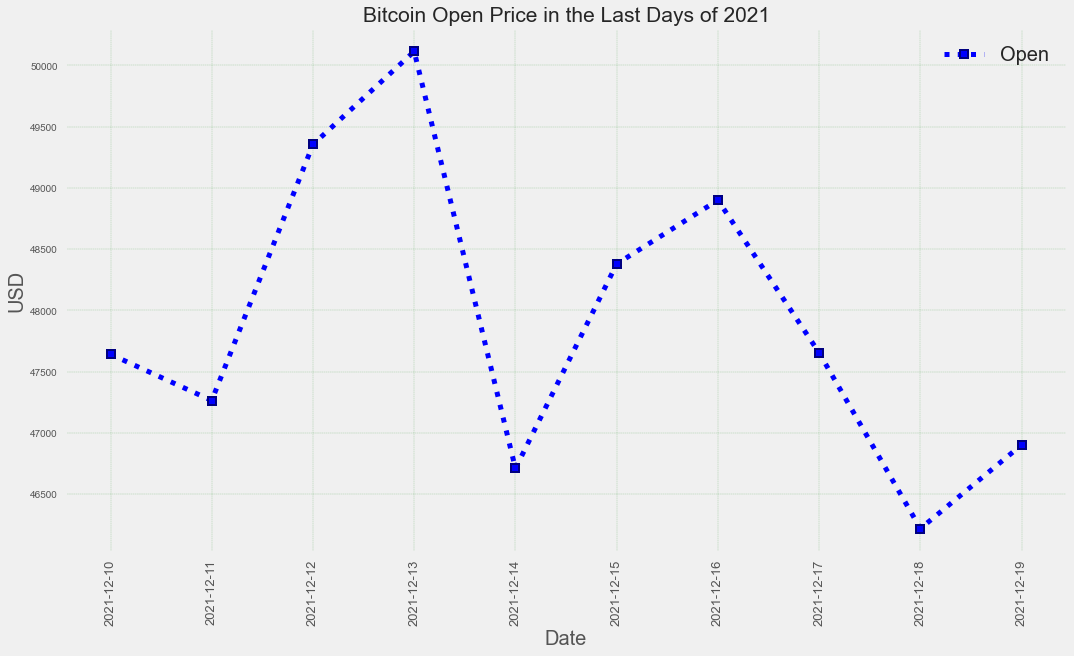

In [64]:
last_10_btc21 = btc21.tail(10)
plt.figure(figsize=(16,9))
plt.plot(last_10_btc21.Date, last_10_btc21.Open, marker="s", c="b", ls=":", lw=5, ms=8, mew=2, mec="navy")
plt.grid(alpha=.4, lw=.4, ls="--", c="g")
plt.title("Bitcoin Open Price in the Last Days of 2021", fontsize=21)
plt.xlabel("Date", fontsize=20)
plt.ylabel("USD", fontsize=20)
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.legend(["Open"], fontsize=20)

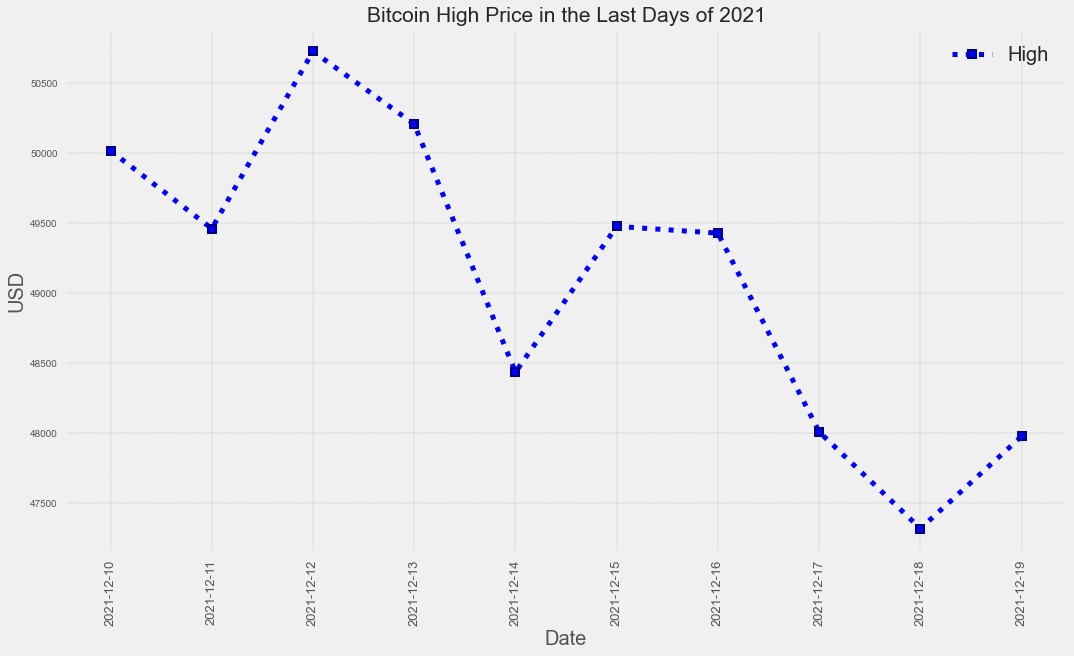

In [67]:
last_10_btc21 = btc21.tail(10)
plt.figure(figsize=(16,9))
plt.plot(last_10_btc21.Date, last_10_btc21.High, marker="s", c="b", ls=":", lw=5, ms=8, mew=2, mec="navy")
plt.grid(alpha=.4, lw=.4, ls="--", c="g")
plt.title("Bitcoin High Price in the Last Days of 2021", fontsize=21)
plt.xlabel("Date", fontsize=20)
plt.ylabel("USD", fontsize=20)
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.legend(["High"], fontsize=20)

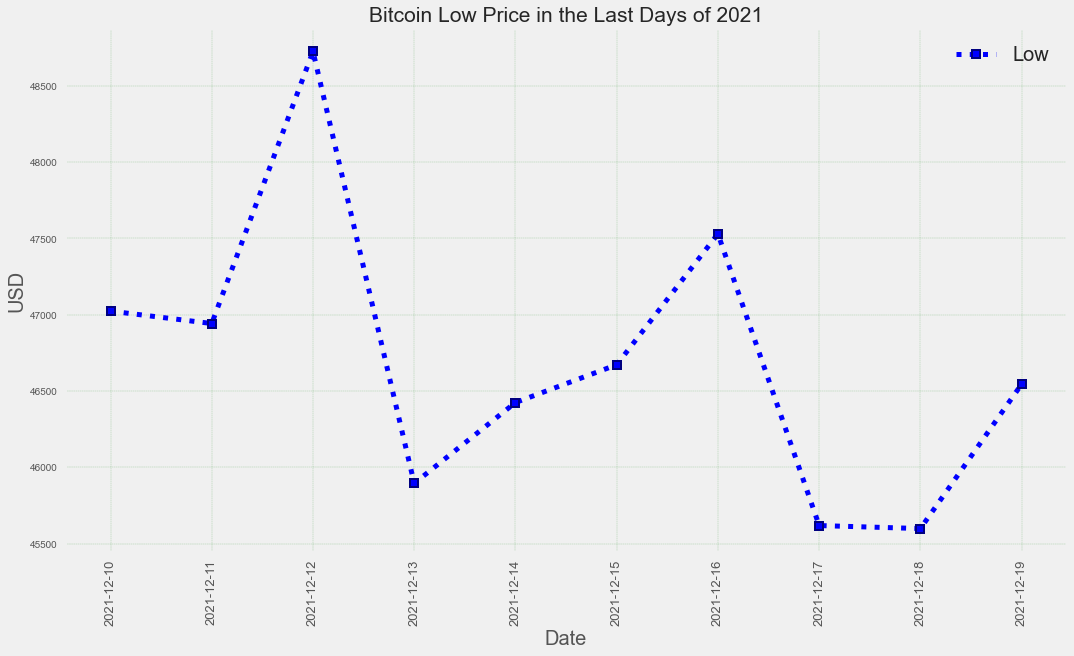

In [68]:
last_10_btc21 = btc21.tail(10)
plt.figure(figsize=(16,9))
plt.plot(last_10_btc21.Date, last_10_btc21.Low, marker="s", c="b", ls=":", lw=5, ms=8, mew=2, mec="navy")
plt.grid(alpha=.4, lw=.4, ls="--", c="g")
plt.title("Bitcoin Low Price in the Last Days of 2021", fontsize=21)
plt.xlabel("Date", fontsize=20)
plt.ylabel("USD", fontsize=20)
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.legend(["Low"], fontsize=20)

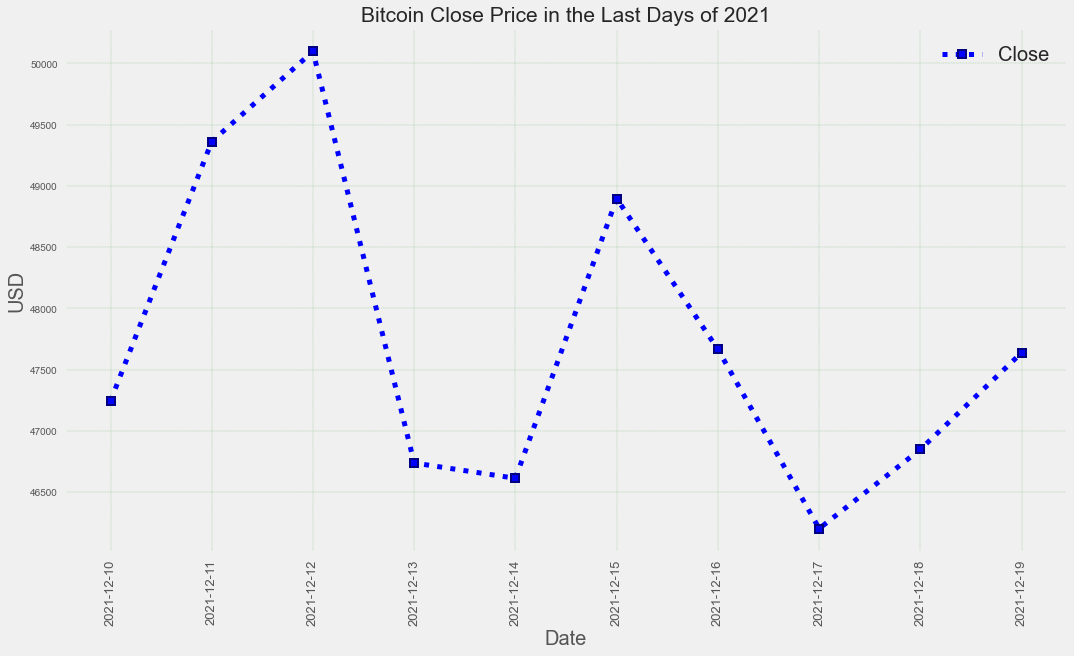

In [69]:
last_10_btc21 = btc21.tail(10)
plt.figure(figsize=(16,9))
plt.plot(last_10_btc21.Date, last_10_btc21.Close, marker="s", c="b", ls=":", lw=5, ms=8, mew=2, mec="navy")
plt.grid(alpha=.4, lw=.4, ls="--", c="g")
plt.title("Bitcoin Close Price in the Last Days of 2021", fontsize=21)
plt.xlabel("Date", fontsize=20)
plt.ylabel("USD", fontsize=20)
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.legend(["Close"], fontsize=20)

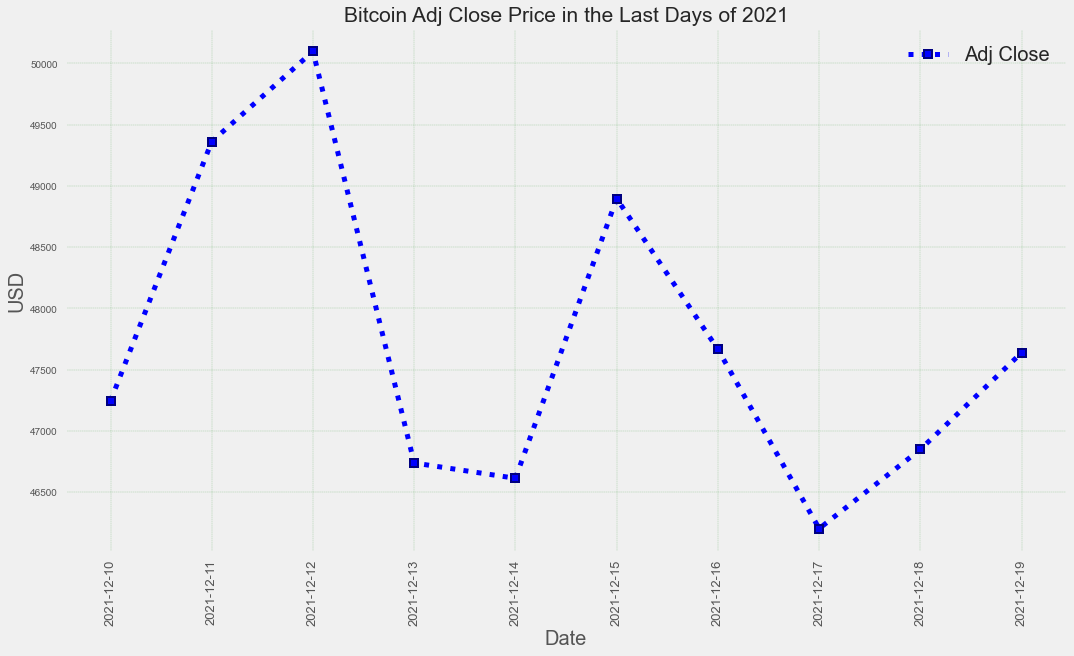

In [70]:
last_10_btc21 = btc21.tail(10)
plt.figure(figsize=(16,9))
plt.plot(last_10_btc21.Date, last_10_btc21["Adj Close"], marker="s", c="b", ls=":", lw=5, ms=8, mew=2, mec="navy")
plt.grid(alpha=.4, lw=.4, ls="--", c="g")
plt.title("Bitcoin Adj Close Price in the Last Days of 2021", fontsize=21)
plt.xlabel("Date", fontsize=20)
plt.ylabel("USD", fontsize=20)
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.legend(["Adj Close"], fontsize=20)

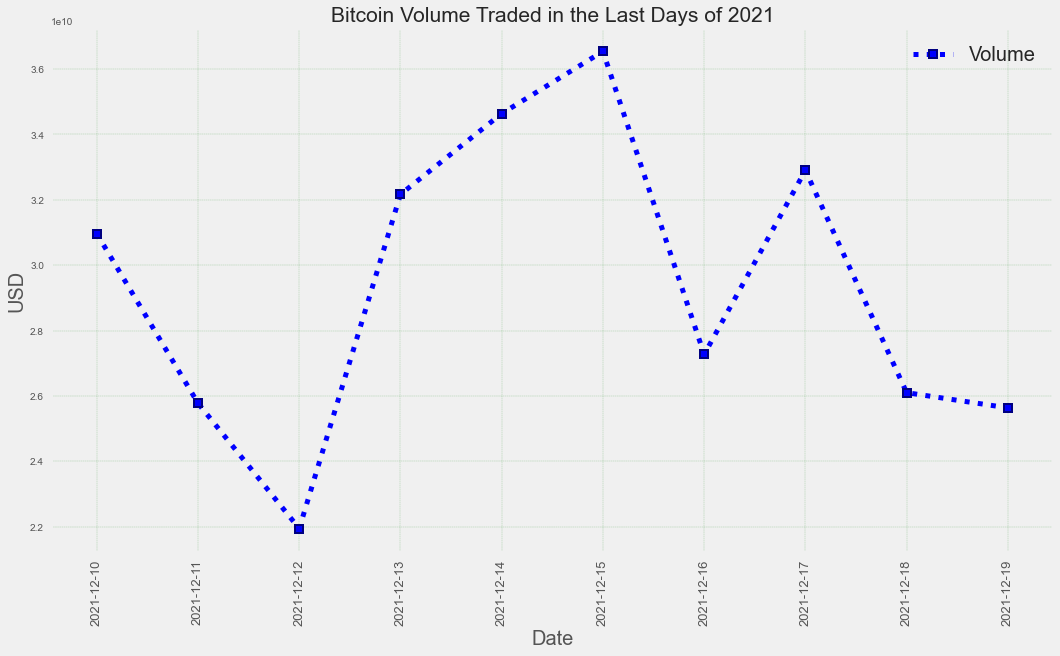

In [71]:
last_10_btc21 = btc21.tail(10)
plt.figure(figsize=(16,9))
plt.plot(last_10_btc21.Date, last_10_btc21.Volume, marker="s", c="b", ls=":", lw=5, ms=8, mew=2, mec="navy")
plt.grid(alpha=.4, lw=.4, ls="--", c="g")
plt.title("Bitcoin Volume Traded in the Last Days of 2021", fontsize=21)
plt.xlabel("Date", fontsize=20)
plt.ylabel("USD", fontsize=20)
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.legend(["Volume"], fontsize=20)

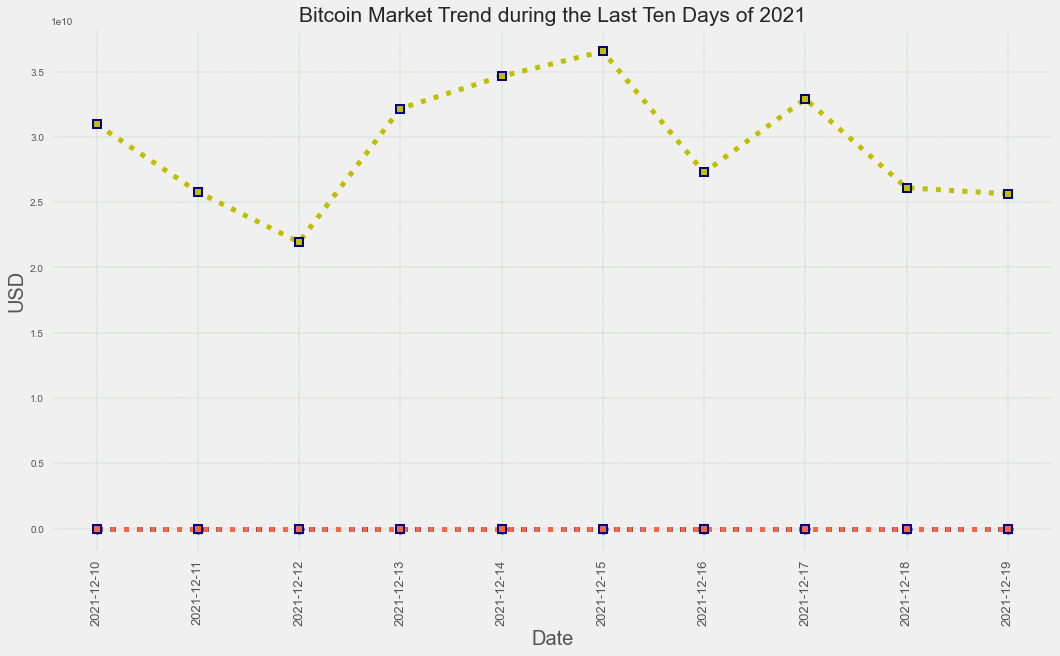

In [75]:
last_10_btc21 = btc21.tail(10)
plt.figure(figsize=(16,9))
plt.plot(last_10_btc21.Date, last_10_btc21.Open, marker="s", c="b", ls=":", lw=5, ms=8, mew=2, mec="navy")
plt.plot(last_10_btc21.Date, last_10_btc21.Close, marker="x", c="r", ls=":", lw=5, ms=8, mew=2, mec="navy");
plt.plot(last_10_btc21.Date, last_10_btc21["Adj Close"], marker="o", c="dodgerblue", ls=":", lw=5, ms=8, mew=2, mec="navy");
plt.plot(last_10_btc21.Date, last_10_btc21.High, marker="s", c="black", ls=":", lw=5, ms=8, mew=2, mec="navy");
plt.plot(last_10_btc21.Date, last_10_btc21.Low, marker="s", c="tomato", ls=":", lw=5, ms=8, mew=2, mec="navy");
plt.plot(last_10_btc21.Date, last_10_btc21.Volume, marker="s", c="y", ls=":", lw=5, ms=8, mew=2, mec="navy");
plt.grid(alpha=.4, lw=.4, ls="--", c="g")
plt.title("Bitcoin Market Trend during the Last Ten Days of 2021", fontsize=21)
plt.xlabel("Date", fontsize=20)
plt.ylabel("USD", fontsize=20)
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)

# Market Trend on Every Last Day of The Year

In [79]:
btc.Day = pd.DatetimeIndex(btc.Date).day

In [80]:
last_day_of_the_year = btc.loc[np.where((btc.Month==12) & (btc.Day==31))]

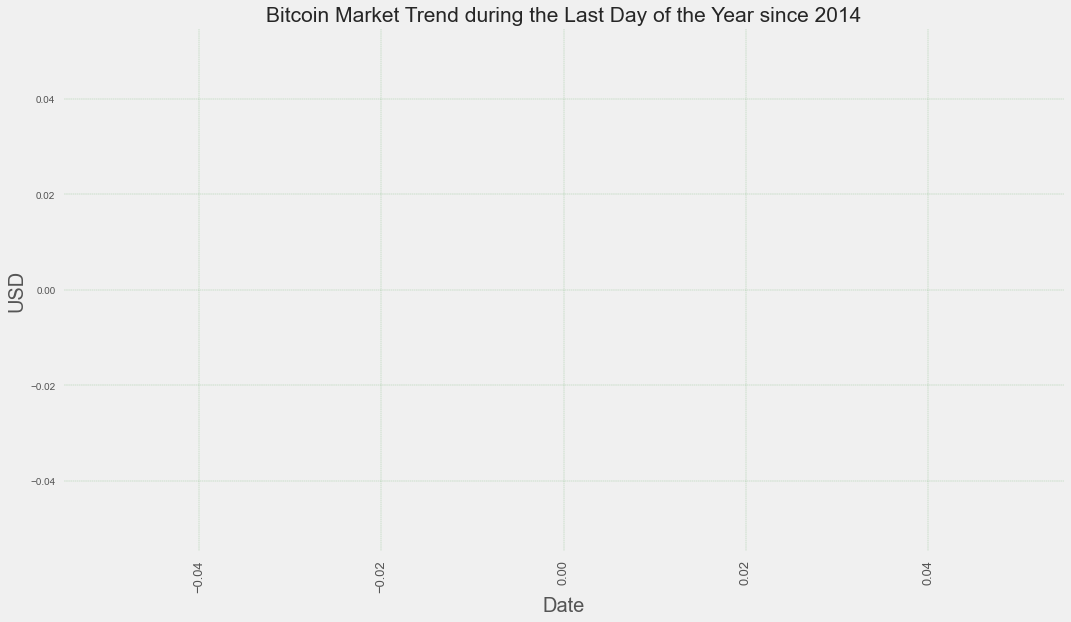

In [81]:
plt.figure(figsize=(16,9))
plt.plot(last_day_of_the_year.Date, last_day_of_the_year.Open, marker="s", c="b", ls=":", lw=5, ms=8, mew=2, mec="navy")
plt.plot(last_day_of_the_year.Date, last_day_of_the_year.Close, marker="x", c="r", ls=":", lw=5, ms=8, mew=2, mec="navy");
plt.plot(last_day_of_the_year.Date, last_day_of_the_year["Adj Close"], marker="o", c="dodgerblue", ls=":", lw=5, ms=8, mew=2, mec="navy");
plt.plot(last_day_of_the_year.Date, last_day_of_the_year.High, marker="s", c="black", ls=":", lw=5, ms=8, mew=2, mec="navy");
plt.plot(last_day_of_the_year.Date, last_day_of_the_year.Low, marker="s", c="tomato", ls=":", lw=5, ms=8, mew=2, mec="navy");
plt.plot(last_day_of_the_year.Date, last_day_of_the_year.Volume, marker="s", c="y", ls=":", lw=5, ms=8, mew=2, mec="navy");
plt.grid(alpha=.4, lw=.4, ls="--", c="g")
plt.title("Bitcoin Market Trend during the Last Day of the Year since 2014", fontsize=21)
plt.xlabel("Date", fontsize=20)
plt.ylabel("USD", fontsize=20)
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)

In [84]:
corr = btc.corr()

In [85]:
corr

,Date,Open,High,Low,Close,Adj Close,Volume,Year
Date,1.000000,-0.012919,-0.012983,-0.013834,-0.014097,-0.014097,0.001740,-0.016829
Open,-0.012919,1.000000,0.999527,0.999063,0.998812,0.998812,0.745974,0.732988
High,-0.012983,0.999527,1.000000,0.999024,0.999482,0.999482,0.749364,0.732787
Low,-0.013834,0.999063,0.999024,1.000000,0.999391,0.999391,0.738560,0.733836
Close,-0.014097,0.998812,0.999482,0.999391,1.000000,1.000000,0.744793,0.733412
Adj Close,-0.014097,0.998812,0.999482,0.999391,1.000000,1.000000,0.744793,0.733412
Volume,0.001740,0.745974,0.749364,0.738560,0.744793,0.744793,1.000000,0.770211
Year,-0.016829,0.732988,0.732787,0.733836,0.733412,0.733412,0.770211,1.000000


<AxesSubplot:>

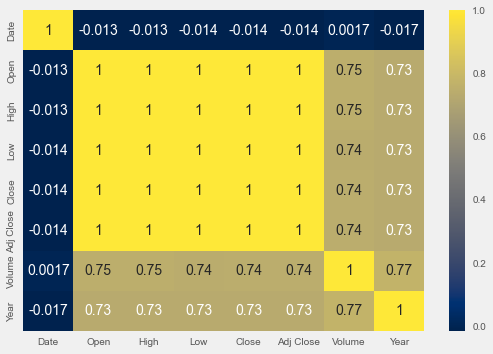

In [86]:
sns.heatmap(corr, cmap="cividis", annot=True)